In [1]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset

In [2]:
cifar_folder = os.path.join("/volumes/Data/cifar-10","cifar-10-batches-py")
allFiles = next(os.walk(cifar_folder))[2]
print("allFiles:", allFiles)

allFiles: ['data_batch_4', 'readme.html', 'test_batch', 'data_batch_3', 'batches.meta', 'data_batch_2', 'data_batch_5', 'data_batch_1']


## load the pickle data

In [3]:
# In[]

def unpickle(file):
  with open(file, 'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
  return dict

label_data_path = os.path.join(cifar_folder, "batches.meta")
labels = unpickle(label_data_path)
print("labels:", labels)

train_dataset_1_path = os.path.join(cifar_folder, "data_batch_1")
train_dataset_1 = unpickle(train_dataset_1_path)
print("train dataset:", train_dataset_1.keys())

labels: {b'num_cases_per_batch': 10000, b'label_names': [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck'], b'num_vis': 3072}
train dataset: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


## Show the data

Notice the image stored in the pickle is the format `(R, R, R, ..., G, G, G, ..., B, B, B ...)` instead of `(R, G, B, R, G, B, ...)`.

Index: 1, Label: b'truck', Filename: b'camion_s_000148.png'


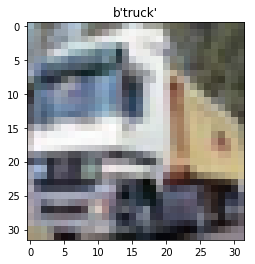

In [5]:
select_img_idx = 1
label = labels[b'label_names'][train_dataset_1[b'labels'][select_img_idx]]

print("Index: {}, Label: {}, Filename: {}".format(\
      select_img_idx,
      label, \
      train_dataset_1[b'filenames'][select_img_idx]))

rawImgData = train_dataset_1[b'data'][select_img_idx]
rawImgData_r = rawImgData[0:1024].reshape(32,32,-1) / 255.0
rawImgData_g = rawImgData[1024:2048].reshape(32,32,-1) / 255.0
rawImgData_b = rawImgData[2048:].reshape(32,32,-1) / 255.0

imgData = np.dstack((rawImgData_r, rawImgData_g, rawImgData_b))

fig, ax = plt.subplots(1,1)
ax.set_title(label)
ax.imshow(imgData)
plt.show()